# Importing frameworks

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, Activation, Dropout
import keras
from sklearn import metrics
import itertools
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import cross_validate
import json
import joblib
from sklearn import tree

# Пользовательские функции

In [2]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [3]:
def plot_class_dist_for_NAN(df, col, certain_value=0):

  y_without_nan_bad = len(df[col].loc[np.array(~df[col].isna()) & np.array(df.BAD == 1) & np.array(df[col] != certain_value)])
  y_without_nan_good = len(df[col].loc[np.array(~df[col].isna()) & np.array(df.BAD == 0) & np.array(df[col] != certain_value)])

  y_nan_bad = len(df[col].loc[np.array(df[col].isna()) & np.array(df.BAD == 1)])
  y_nan_good = len(df[col].loc[np.array(df[col].isna()) & np.array(df.BAD == 0)])

  y_val_bad = len(df[col].loc[np.array(df.BAD == 1) & np.array(df[col] == certain_value)])
  y_val_good = len(df[col].loc[np.array(df.BAD == 0) & np.array(df[col] == certain_value)])

  x = np.array([0])
  col_names = np.array(['BAD', 'GOOD'])


  plt.figure(figsize=(15,5))

  plt.suptitle(col, size=20)

  plt.subplot(1,3,1, title='!= NAN')
  plt.bar(x, y_without_nan_bad, width=0.4, color='r', label=f'BAD ({y_without_nan_bad})')
  plt.bar(x + 0.4, y_without_nan_good, width=0.4, color='g', label=f'GOOD ({y_without_nan_good})')
  plt.xticks([0,0.4], col_names, horizontalalignment= 'right')
  plt.legend()

  plt.subplot(1,3,2, title='= NAN')
  plt.bar(x, y_nan_bad, width=0.4, color='r', label=f'BAD ({y_nan_bad})')
  plt.bar(x + 0.4, y_nan_good, width=0.4, color='g', label=f'GOOD ({y_nan_good})')
  plt.xticks([0,0.4], col_names, horizontalalignment= 'right')
  plt.legend()

  plt.subplot(1,3,3, title=f'= {certain_value}')
  plt.bar(x, y_val_bad, width=0.4, color='r', label=f'BAD ({y_val_bad})')
  plt.bar(x + 0.4, y_val_good, width=0.4, color='g', label=f'GOOD ({y_val_good})')
  plt.xticks([0,0.4], col_names, horizontalalignment= 'right')
  plt.legend()

  plt.legend()

  plt.show()

In [4]:
def get_result(y_true, y_pred, get_scores=True, get_plot=True, get_percents=True):
    result_scores = [round(metrics.accuracy_score(y_true, y_pred),2), round(metrics.f1_score(y_true, y_pred),2), round(metrics.precision_score(y_true, y_pred),2), round(metrics.recall_score(y_true, y_pred),2)]
    if get_scores:
        print(f'\nMetrics in test:\nAccuracy {result_scores[0]}\nF1 score {result_scores[1]}\nPrecision {result_scores[2]}\nRecall {result_scores[3]}', end='\n\n')
    cnf_matrix = metrics.confusion_matrix(y_true, y_pred)
    if get_plot:
        plot_confusion_matrix(cnf_matrix, ['GOOD', 'BAD'], title='Confusion matrix - LinearRegression', cmap=plt.cm.Blues)
    if get_percents:
        print(f'{round((cnf_matrix[1][0]) / (cnf_matrix[1][0]+cnf_matrix[1][1]) * 100, 2)}% среди плохих заемщиков был одобрен кредит')
        print(f'{round((cnf_matrix[1][1]) / (cnf_matrix[1][0]+cnf_matrix[1][1]) * 100, 2)}% среди плохих заемщиков были определены как плохие', end='\n\n')
        print(f'{round((cnf_matrix[0][1]) / (cnf_matrix[0][0]+cnf_matrix[0][1]) * 100, 2)}% среди хороших заемщиков было отказано в кредите')
        print(f'{round((cnf_matrix[0][0]) / (cnf_matrix[0][0]+cnf_matrix[0][1]) * 100, 2)}% среди хороших заемщиков были определены как хорошие')
    return result_scores

In [5]:
def get_bin_pred(arr, threshold):
  return np.array([x >= threshold for x in arr])

In [6]:
def LearningPlots(x_range, train_metrics, test_metrics):
  
  plt.figure(figsize=(20,5))

  plt.subplot(*[1, 4, 1], title='F1-score')
  plt.plot(x_range, train_metrics['f1'], label='Train')
  plt.plot(x_range, test_metrics['f1'], label='Validation')
  plt.legend()

  plt.subplot(*[1, 4, 2], title='Precision')
  plt.plot(x_range, train_metrics['precision'], label='Train')
  plt.plot(x_range, test_metrics['precision'], label='Validation')
  plt.legend()

  plt.subplot(*[1, 4, 3], title='Accuracy')
  plt.plot(x_range, train_metrics['accuracy'], label='Train')
  plt.plot(x_range, test_metrics['accuracy'], label='Validation')
  plt.legend()

  plt.subplot(*[1, 4, 4], title='Recall')
  plt.plot(x_range, train_metrics['recall'], label='Train')
  plt.plot(x_range, test_metrics['recall'], label='Validation')
  plt.legend()

  plt.show()

class ModelMetrics():
  def __init__(self):
    self.accuracy = []
    self.f1 = []
    self.precision = []
    self.recall = []

    self.accuracy_val = []
    self.f1_val = []
    self.precision_val = []
    self.recall_val = []

  def AddMetrics(self, y_true, y_pred, type):
    if type == 'validation':
      self.accuracy_val += [metrics.accuracy_score(y_true, y_pred)]
      self.f1_val += [metrics.f1_score(y_true, y_pred)]
      self.precision_val += [metrics.precision_score(y_true, y_pred)]
      self.recall_val += [metrics.recall_score(y_true, y_pred)]
      return
    if type == 'train':
      self.accuracy += [metrics.accuracy_score(y_true, y_pred)]
      self.f1 += [metrics.f1_score(y_true, y_pred)]
      self.precision += [metrics.precision_score(y_true, y_pred)]
      self.recall += [metrics.recall_score(y_true, y_pred)]
      return
  
  def SetMetrics(self, metrics_dict, type):
    if type == 'validation':
      self.accuracy_val = metrics_dict['accuracy']
      self.f1_val = metrics_dict['f1']
      self.precision_val = metrics_dict['precision']
      self.recall_val = metrics_dict['recall']
      return
    if type == 'train':
      self.accuracy = metrics_dict['accuracy']
      self.f1 = metrics_dict['f1']
      self.precision = metrics_dict['precision']
      self.recall = metrics_dict['recall']
      return

  def GetTrainMetrics(self):
    return {'accuracy':self.accuracy, 'f1':self.f1, 'precision':self.precision, 'recall':self.recall}
  
  def GetValidationMetrics(self):
    return {'accuracy':self.accuracy_val, 'f1':self.f1_val, 'precision':self.precision_val, 'recall':self.recall_val}


In [7]:
def PlotFeatureImportances(col_names, importances, name=""):
    
    indices = np.argsort(importances)

    plt.figure(figsize=(10,10))
    plt.title(f'Feature Importances - {name}')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [col_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()  

# Loading and preprocessing dataset

In [8]:
df = pd.read_csv(r"C:\Users\71380279\Desktop\Scoring\hmeq.csv", encoding='utf-8', sep=',')

In [9]:
df['NANNUM'] = df.isna().sum(axis=1)

In [10]:
mean_values_ = dict(df.mean())

C:\Users\71380279\AppData\Local\Temp\ipykernel_11604\3505364787.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_values_ = dict(df.mean())


In [11]:
with open("mean_values.json", "w") as write_file:
    json.dump(mean_values_, write_file)

In [12]:
df.shape

(5960, 14)

In [13]:
df.isna().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
NANNUM        0
dtype: int64

In [14]:
df.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
NANNUM       12
dtype: int64


LOAN - сумма заявки на кредит

MORTDUE - сумма к оплате по существующей ипотеке

VALUE - стоимость текущего имущества

YOJ - время работы на текущей работе

DEROG - количество негативных отзывов

DELINQ - количетсво простроченных кредитов

CLAGE - возраст самой первой торговой линии в месяцах

NINQ - количество последних кредитных запросов

JOB - тукущая работа

REASON - цель кредита

DEBTINC - отношение долга к доходу

CLNO - количетсво кредитных линий

BAD - таргетное значение (невозврат кредита)

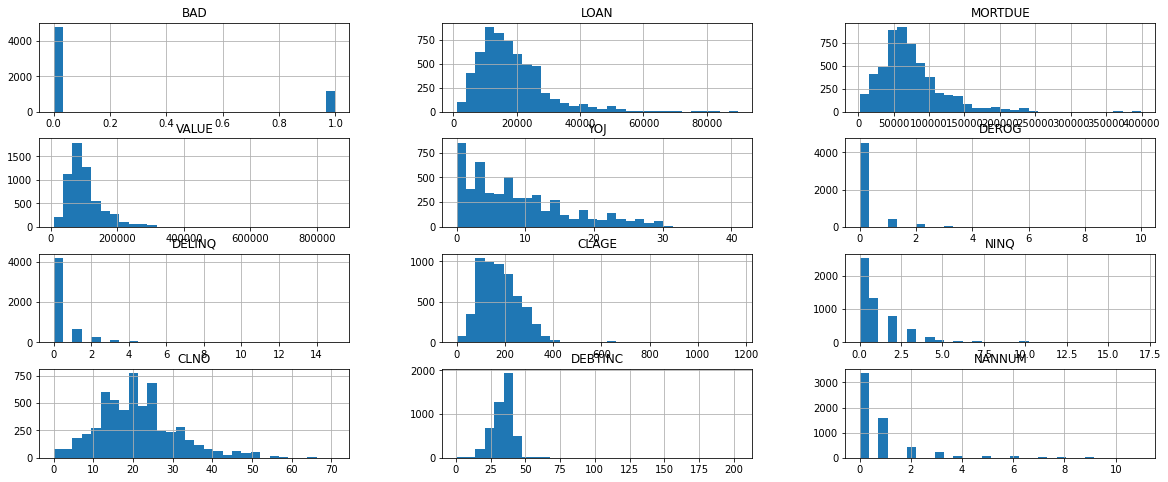

In [15]:
df.hist(bins=30, figsize=(20,8))
plt.show()

# Уменьшение несимметричности распределения значений путем логарифмирования

In [16]:
#pd.DataFrame(np.log(df.YOJ+1)).hist(bins=30)

In [17]:
#df.YOJ = pd.DataFrame(np.log(df.YOJ+1))

In [18]:
#pd.DataFrame(np.log(df.NINQ+1)).hist(bins=30)

In [19]:
#df.NINQ = pd.DataFrame(np.log(df.NINQ+1))

In [20]:
#pd.DataFrame(np.log(df.DELINQ+1)).hist(bins=30)

In [21]:
#df.DELINQ = pd.DataFrame(np.log(df.DELINQ+1))

In [22]:
#for col in df.drop(['BAD','REASON','JOB'],axis=1).columns:
#    df[col] = np.log(df[col]+1)

# Обработка пропущенных значений

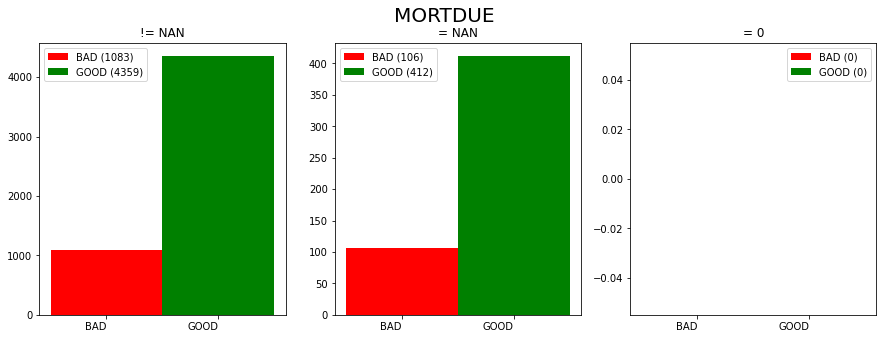

In [23]:
plot_class_dist_for_NAN(df,'MORTDUE')

Распределение классов для поля MORTDUE не значительно изменяется. Соответственно наличие данных о долге по текущей ипотеке не сильно влияет на дефолт заемщика. Заменим средним по столбцу

In [24]:
df['MORT'] = df['MORTDUE'].isna() * 1.
df['MORTDUE'] = df['MORTDUE'].fillna(df.MORTDUE.mean())

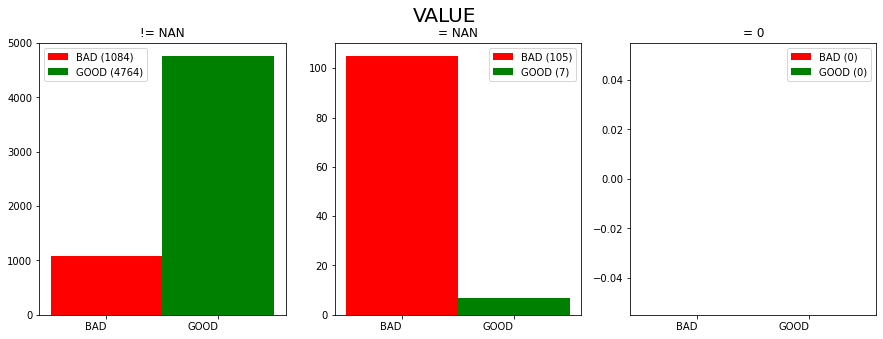

In [25]:
plot_class_dist_for_NAN(df, 'VALUE')

Очевидно, что пропущенные значения в поле VALUE говорит о плохом заемщике, ведь из 112 случаев вернули кредит только 7. Заполним поле значением 0 и добавим поле POOR - малоимущий

In [26]:
df['POOR'] = df['VALUE'].isna() * 1.
df['VALUE'] = df['VALUE'].fillna(df.VALUE.mean())

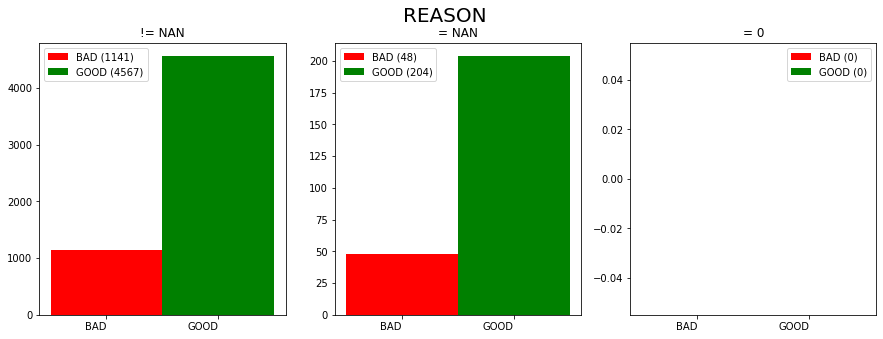

In [27]:
plot_class_dist_for_NAN(df,'REASON')

In [28]:
df['REASON'].unique()

array(['HomeImp', nan, 'DebtCon'], dtype=object)

Заменим модой по столбцу

In [29]:
df['REASONnun'] = df['REASON'].isna() * 1.
df['REASON'] = df['REASON'].fillna(df.REASON.mode()[0])

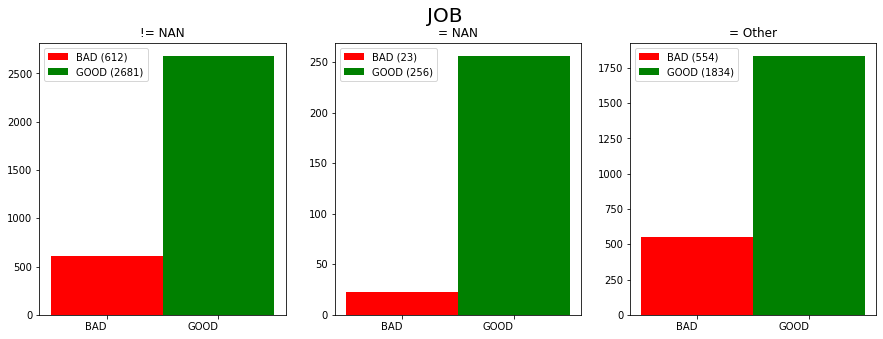

In [30]:
plot_class_dist_for_NAN(df, 'JOB', 'Other')

In [31]:
df.JOB.unique()

array(['Other', nan, 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self'],
      dtype=object)

In [32]:
(256 / 23) / (2681 / 612)

2.540778100319478

Заметно, что среди клиентов, имеющих в поле JOB пустое значение дефолт наступает в 2.5 раза реже, чем с заполненным полем. Пустые значения нельзя заполнить значениями "Other", так как заемщики с таким полем имеют другое распределение классов. Заполним пустые значения значением Unemployed - безработный. 

In [33]:
df['JOB'] = df['JOB'].fillna('Unemployed')

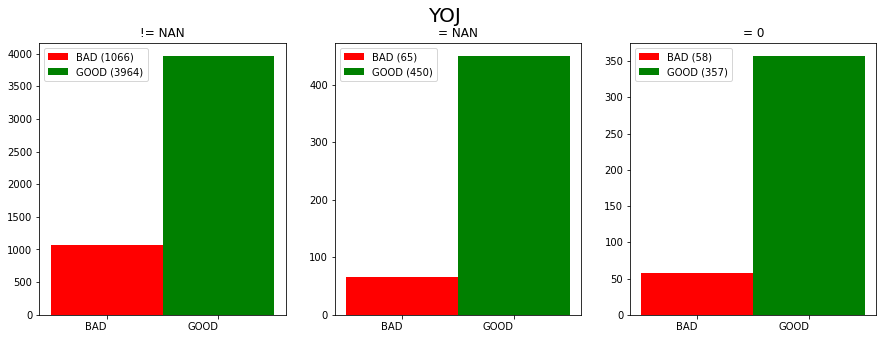

In [34]:
plot_class_dist_for_NAN(df,'YOJ')

Если предположить, что отсутствие данных в поле "Время работы на текущей работе" говорит об отсутствии работы, то не логично, что дофолт наступает реже при отсуствующем значении, чем при его наличии. Заполним пропущенные значения средним по столбцу.

In [35]:
df['YOJnun'] = df['YOJ'].isna() * 1.
df['YOJ'] = df['YOJ'].fillna(df.YOJ.mean())

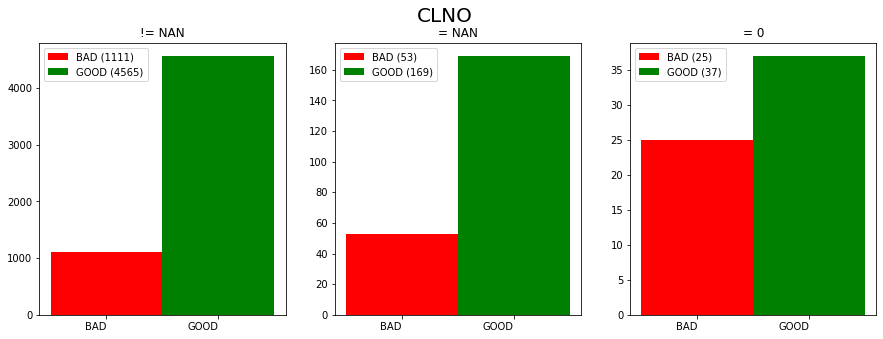

In [36]:
plot_class_dist_for_NAN(df,'CLNO')

In [37]:
df.loc[df.CLNO.isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 3 to 4947
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BAD        222 non-null    int64  
 1   LOAN       222 non-null    int64  
 2   MORTDUE    222 non-null    float64
 3   VALUE      222 non-null    float64
 4   REASON     222 non-null    object 
 5   JOB        222 non-null    object 
 6   YOJ        222 non-null    float64
 7   DEROG      0 non-null      float64
 8   DELINQ     0 non-null      float64
 9   CLAGE      0 non-null      float64
 10  NINQ       0 non-null      float64
 11  CLNO       0 non-null      float64
 12  DEBTINC    164 non-null    float64
 13  NANNUM     222 non-null    int64  
 14  MORT       222 non-null    float64
 15  POOR       222 non-null    float64
 16  REASONnun  222 non-null    float64
 17  YOJnun     222 non-null    float64
dtypes: float64(13), int64(3), object(2)
memory usage: 33.0+ KB


По плученным данным можно сделать вывод, что отсутствие записи в поле CLNO говорит об отсутствии кредитной истории заемщика. Заменим модой по столбцу 

In [38]:
df['CLNOnun'] = df['CLNO'].isna() * 1.
df['CLNO'] = df['CLNO'].fillna(df.CLNO.mode()[0])

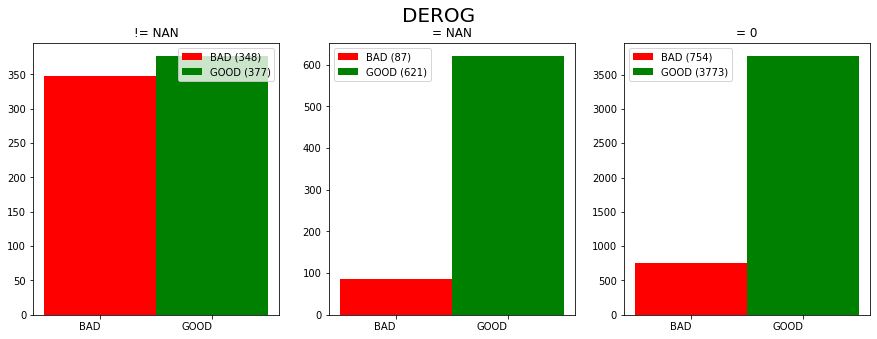

In [39]:
plot_class_dist_for_NAN(df,'DEROG')

In [40]:
(621/87)/(377/248)

4.695509009421019

Логично предположить, что отсутствие негативных отзывов о заемщике положительно сказывается на его надежности и как видим, доля дефолтов при пустом поле DEROG почти в 5 раза ниже, чем при заполненном ненулевыми значениями. Заполним данное поле значением 0, так как разделение на классы достаточно близко.

In [41]:
df['DEROGnun'] = df['DEROG'].isna() * 1.
df['DEROG'] = df['DEROG'].fillna(0)

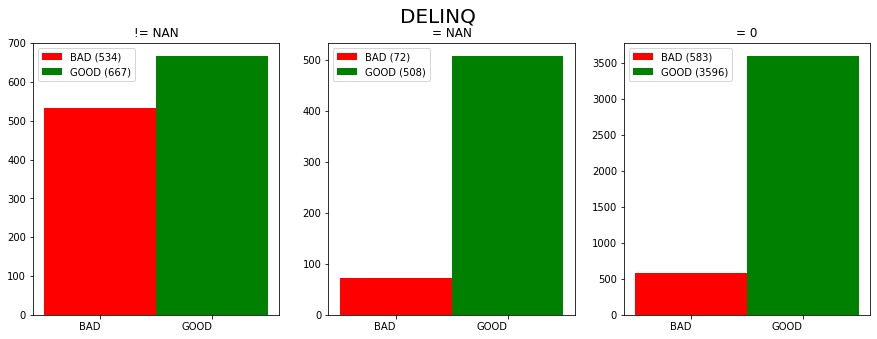

In [42]:
plot_class_dist_for_NAN(df,'DELINQ')

In [43]:
(508/72)/(667/534)

5.648675662168915

Очевидно, что нулевое количество просроченных кредитов значительно повышает надежность заемщика. Видно, что доля дефолтов при пустом поле DELINQ почти в 6 раз ниже, чем при наличии просроченных кредитов. Заполним поле значением 0, так как распределения классов похожи

In [44]:
df['DELINQnun'] = df['DELINQ'].isna() * 1.
df['DELINQ'] = df['DELINQ'].fillna(0)

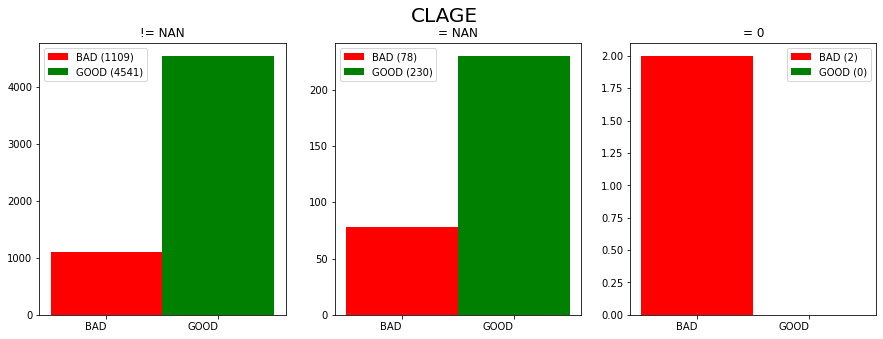

In [45]:
plot_class_dist_for_NAN(df,'CLAGE')

Заменим средним по столбцу

In [46]:
df['CLAGEnun'] = df['CLAGE'].isna() * 1.
df['CLAGE'] = df['CLAGE'].fillna(df.CLAGE.mean())

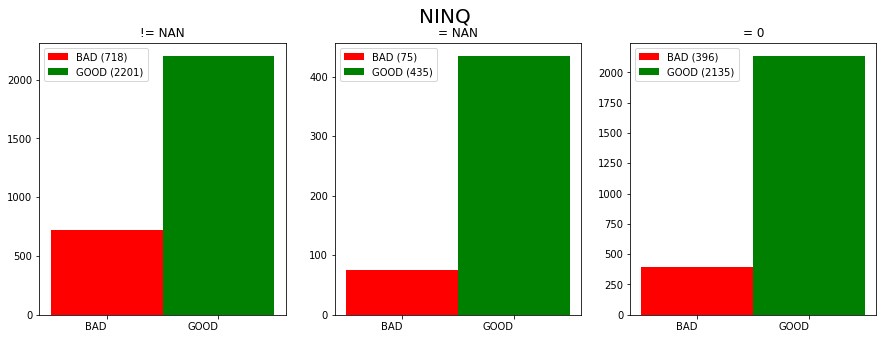

In [47]:
plot_class_dist_for_NAN(df,'NINQ')

Аналогично с предыдущим, заполняем средним

In [48]:
df['NINQnun'] = df['NINQ'].isna() * 1.
df['NINQ'] = df['NINQ'].fillna(df.NINQ.mean())

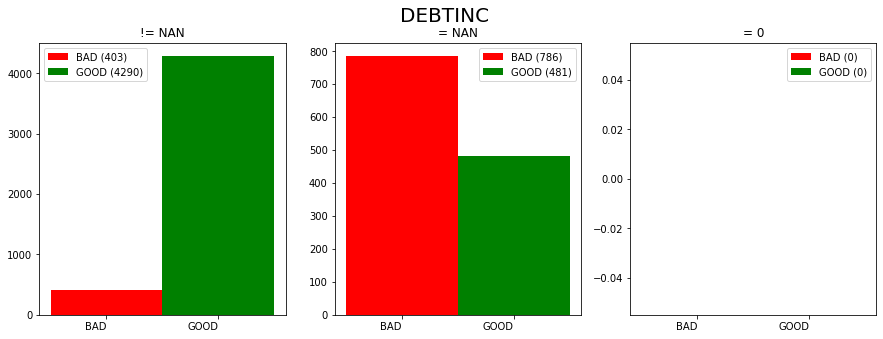

In [49]:
plot_class_dist_for_NAN(df,'DEBTINC')

Явное отличие доли ненадежных клиентов при наличии пропущенного значения в поле DEBTINC и наличии числового значения. Можно предположить, что некоторые клиенты не имеют дохода, в следствии чего появляется пропущенное значение в поле "отношение долга к доходу". Запонить его значением 0 будет неверно - тогда получаем, что у клиента очень большой доход и нет долга. Поэтому заменим пропущенные значения средним по столбцу и добавим еще один столбец - INCOME - наличие дохода.

In [50]:
df['INCOME'] = ~df.DEBTINC.isna() * 1.

In [51]:
df['DEBTINC'] = df['DEBTINC'].fillna(df['DEBTINC'].mean())

In [52]:
df.head(1)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,MORT,POOR,REASONnun,YOJnun,CLNOnun,DEROGnun,DELINQnun,CLAGEnun,NINQnun,INCOME
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
df.groupby('BAD').mean()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,...,MORT,POOR,REASONnun,YOJnun,CLNOnun,DEROGnun,DELINQnun,CLAGEnun,NINQnun,INCOME
BAD,,,,,,,,,,,,,,,,,,,,,
0,19028.107315,74736.984556,102594.718103,9.132995,0.116747,0.219032,186.653519,1.046727,21.128694,33.306238,...,0.086355,0.001467,0.042758,0.094320,0.035422,0.130161,0.106477,0.048208,0.091176,0.899183
1,16922.119428,69843.832795,98491.043253,8.076701,0.656013,1.154752,152.130415,1.745125,20.978974,35.680601,...,0.089151,0.088310,0.040370,0.054668,0.044575,0.073171,0.060555,0.065601,0.063078,0.338940


In [54]:
df.shape

(5960, 24)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BAD        5960 non-null   int64  
 1   LOAN       5960 non-null   int64  
 2   MORTDUE    5960 non-null   float64
 3   VALUE      5960 non-null   float64
 4   REASON     5960 non-null   object 
 5   JOB        5960 non-null   object 
 6   YOJ        5960 non-null   float64
 7   DEROG      5960 non-null   float64
 8   DELINQ     5960 non-null   float64
 9   CLAGE      5960 non-null   float64
 10  NINQ       5960 non-null   float64
 11  CLNO       5960 non-null   float64
 12  DEBTINC    5960 non-null   float64
 13  NANNUM     5960 non-null   int64  
 14  MORT       5960 non-null   float64
 15  POOR       5960 non-null   float64
 16  REASONnun  5960 non-null   float64
 17  YOJnun     5960 non-null   float64
 18  CLNOnun    5960 non-null   float64
 19  DEROGnun   5960 non-null   float64
 20  DELINQnu

# Обработка пропущенных значений путем замены на средние и моду

In [56]:
#df.REASON.unique()

In [57]:
#df.nunique()

In [58]:
'''
col_names_to_mode_replace = ['REASON','JOB', 'YOJ', 'DEROG', 'DELINQ', 'NINQ', 'CLNO']
mode_features_values = dict(zip(col_names_to_mode_replace, 
                [df.REASON.mode()[0], 
                 df.JOB.mode()[0], 
                 df.YOJ.mode()[0], 
                 df.DEROG.mode()[0], 
                 df.DELINQ.mode()[0], 
                 df.NINQ.mode()[0], 
                 df.CLNO.mode()[0]]))

col_names_to_mean_replace = ['LOAN','MORTDUE', 'VALUE', 'CLAGE', 'DEBTINC']
mean_features_values = dict(zip(col_names_to_mean_replace, 
                [df.LOAN.mean(), 
                 df.MORTDUE.mean(), 
                 df.VALUE.mean(), 
                 df.CLAGE.mean(),
                 df.DEBTINC.mean()]))
'''

"\ncol_names_to_mode_replace = ['REASON','JOB', 'YOJ', 'DEROG', 'DELINQ', 'NINQ', 'CLNO']\nmode_features_values = dict(zip(col_names_to_mode_replace, \n                [df.REASON.mode()[0], \n                 df.JOB.mode()[0], \n                 df.YOJ.mode()[0], \n                 df.DEROG.mode()[0], \n                 df.DELINQ.mode()[0], \n                 df.NINQ.mode()[0], \n                 df.CLNO.mode()[0]]))\n\ncol_names_to_mean_replace = ['LOAN','MORTDUE', 'VALUE', 'CLAGE', 'DEBTINC']\nmean_features_values = dict(zip(col_names_to_mean_replace, \n                [df.LOAN.mean(), \n                 df.MORTDUE.mean(), \n                 df.VALUE.mean(), \n                 df.CLAGE.mean(),\n                 df.DEBTINC.mean()]))\n"

In [59]:
#df[col_names_to_mode_replace] = df[col_names_to_mode_replace].fillna(mode_features_values)
#df[col_names_to_mean_replace] = df[col_names_to_mean_replace].fillna(mean_features_values)

In [60]:
#df.head(1)

In [61]:
#df['VALUEtoLOAN'] = df.VALUE / df.LOAN
#df['VALUEtoMORTDUE'] = df.VALUE / df.MORTDUE
#df['VALUEtoDEBT'] = df.VALUE / (df.LOAN + df.MORTDUE)

In [62]:
#df.info()

# Preprocessing

In [63]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,...,MORT,POOR,REASONnun,YOJnun,CLNOnun,DEROGnun,DELINQnun,CLAGEnun,NINQnun,INCOME
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,...,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.224329,0.405705,179.766275,1.186055,21.098826,...,0.086913,0.018792,0.042282,0.086409,0.037248,0.118792,0.097315,0.051678,0.085570,0.787416
std,0.399656,11207.480417,42481.395689,56843.931566,7.239301,0.798458,1.079256,83.563059,1.653046,9.998714,...,0.281731,0.135801,0.201248,0.280991,0.189386,0.323571,0.296412,0.221394,0.279752,0.409170
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11100.000000,48139.000000,66489.500000,3.000000,0.000000,0.000000,117.371430,0.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,16300.000000,69529.000000,90000.000000,8.000000,0.000000,0.000000,178.076005,1.000000,20.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,23300.000000,88200.250000,119004.750000,12.000000,0.000000,0.000000,227.143058,2.000000,26.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
df.corr()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,...,MORT,POOR,REASONnun,YOJnun,CLNOnun,DEROGnun,DELINQnun,CLAGEnun,NINQnun,INCOME
BAD,1.000000,-0.075099,-4.603368e-02,-2.885192e-02,-5.831417e-02,0.269921,0.346503,-1.651130e-01,1.688512e-01,-0.005984,...,3.965597e-03,2.555726e-01,-0.004743,-5.639737e-02,1.931519e-02,-0.070392,-0.061917,3.139816e-02,-4.014044e-02,-5.472149e-01
LOAN,-0.075099,1.000000,2.161000e-01,3.318621e-01,1.006637e-01,0.006996,-0.028869,8.687390e-02,4.316002e-02,0.081751,...,-1.110406e-02,6.373809e-03,-0.048563,4.712196e-02,-1.027712e-01,-0.079919,-0.038484,-8.240649e-02,-6.759838e-02,1.038110e-01
MORTDUE,-0.046034,0.216100,1.000000e+00,7.797869e-01,-8.285640e-02,-0.046476,0.000542,1.307568e-01,2.947991e-02,0.306235,...,3.044457e-16,-3.358139e-04,-0.019581,-5.785695e-02,-2.479287e-02,0.022821,-0.012214,-2.181555e-02,-1.841094e-02,6.169835e-02
VALUE,-0.028852,0.331862,7.797869e-01,1.000000e+00,7.381977e-03,-0.040727,-0.003615,1.679382e-01,-4.216352e-03,0.267312,...,-1.808716e-01,-5.002130e-17,-0.019932,-8.766138e-02,-4.591868e-02,-0.036628,-0.079421,-5.438268e-02,-6.239626e-02,5.154807e-02
YOJ,-0.058314,0.100664,-8.285640e-02,7.381977e-03,1.000000e+00,-0.056245,0.046648,1.909374e-01,-6.789756e-02,0.026849,...,-1.055823e-02,8.777808e-03,0.018188,-2.657022e-17,-2.938690e-02,-0.026190,-0.077927,-5.675216e-02,-5.264495e-02,1.543515e-02
DEROG,0.269921,0.006996,-4.647566e-02,-4.072672e-02,-5.624508e-02,1.000000,0.171286,-8.014439e-02,1.467000e-01,0.056015,...,1.253109e-02,1.034991e-01,0.009889,2.204303e-02,-5.526698e-02,-0.103163,-0.014260,-3.901026e-02,1.196247e-03,-1.765816e-01
DELINQ,0.346503,-0.028869,5.415320e-04,-3.614572e-03,4.664761e-02,0.171286,1.000000,2.487426e-02,5.721226e-02,0.165992,...,-5.251695e-02,1.517802e-01,0.012951,-6.802918e-02,-7.394659e-02,0.032082,-0.123437,-8.705760e-02,-6.386812e-02,-2.340774e-01
CLAGE,-0.165113,0.086874,1.307568e-01,1.679382e-01,1.909374e-01,-0.080144,0.024874,1.000000e+00,-1.100910e-01,0.230427,...,2.224770e-02,-2.513068e-02,0.044632,7.370362e-02,1.081627e-16,0.029952,-0.026176,5.392612e-17,-8.489111e-03,8.734338e-02
NINQ,0.168851,0.043160,2.947991e-02,-4.216352e-03,-6.789756e-02,0.146700,0.057212,-1.100910e-01,1.000000e+00,0.084719,...,-3.683913e-02,1.098661e-02,-0.022020,-3.291146e-02,-3.030279e-17,0.077202,0.054296,1.558994e-02,-3.195864e-17,-1.450820e-01
CLNO,-0.005984,0.081751,3.062352e-01,2.673119e-01,2.684934e-02,0.056015,0.165992,2.304273e-01,8.471872e-02,1.000000,...,-2.420558e-01,-8.783275e-03,-0.064541,-1.322948e-01,-1.003133e-01,0.012917,-0.072098,-2.015313e-01,-7.501675e-02,-4.093147e-03


In [65]:
df.groupby('BAD').mean()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,...,MORT,POOR,REASONnun,YOJnun,CLNOnun,DEROGnun,DELINQnun,CLAGEnun,NINQnun,INCOME
BAD,,,,,,,,,,,,,,,,,,,,,
0,19028.107315,74736.984556,102594.718103,9.132995,0.116747,0.219032,186.653519,1.046727,21.128694,33.306238,...,0.086355,0.001467,0.042758,0.094320,0.035422,0.130161,0.106477,0.048208,0.091176,0.899183
1,16922.119428,69843.832795,98491.043253,8.076701,0.656013,1.154752,152.130415,1.745125,20.978974,35.680601,...,0.089151,0.088310,0.040370,0.054668,0.044575,0.073171,0.060555,0.065601,0.063078,0.338940


LOAN - сумма заявки на кредит

MORTDUE - сумма к оплате по существующей ипотеке

VALUE - стоимость текущего имущества

YOJ - время работы на текущей работе

DEROG - количество негативных отзывов

DELINQ - количетсво простроченных кредитов

CLAGE - возраст самой первой торговой линии в месяцах

NINQ - количество последних кредитных запросов

JOB - тукущая работа

REASON - цель кредита

DEBTINC - отношение долга к доходу

CLNO - количетсво кредитных линий

BAD - таргетное значение (невозврат кредита)


In [66]:
df.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC', 'NANNUM', 'MORT', 'POOR',
       'REASONnun', 'YOJnun', 'CLNOnun', 'DEROGnun', 'DELINQnun', 'CLAGEnun',
       'NINQnun', 'INCOME'],
      dtype='object')

In [67]:
df.REASON.unique()

array(['HomeImp', 'DebtCon'], dtype=object)

In [68]:
df['REASON'] = (np.array(df['REASON']) == 'DebtCon') * 1.

In [69]:
df.JOB.unique()

array(['Other', 'Unemployed', 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self'],
      dtype=object)

In [70]:
df.shape

(5960, 24)

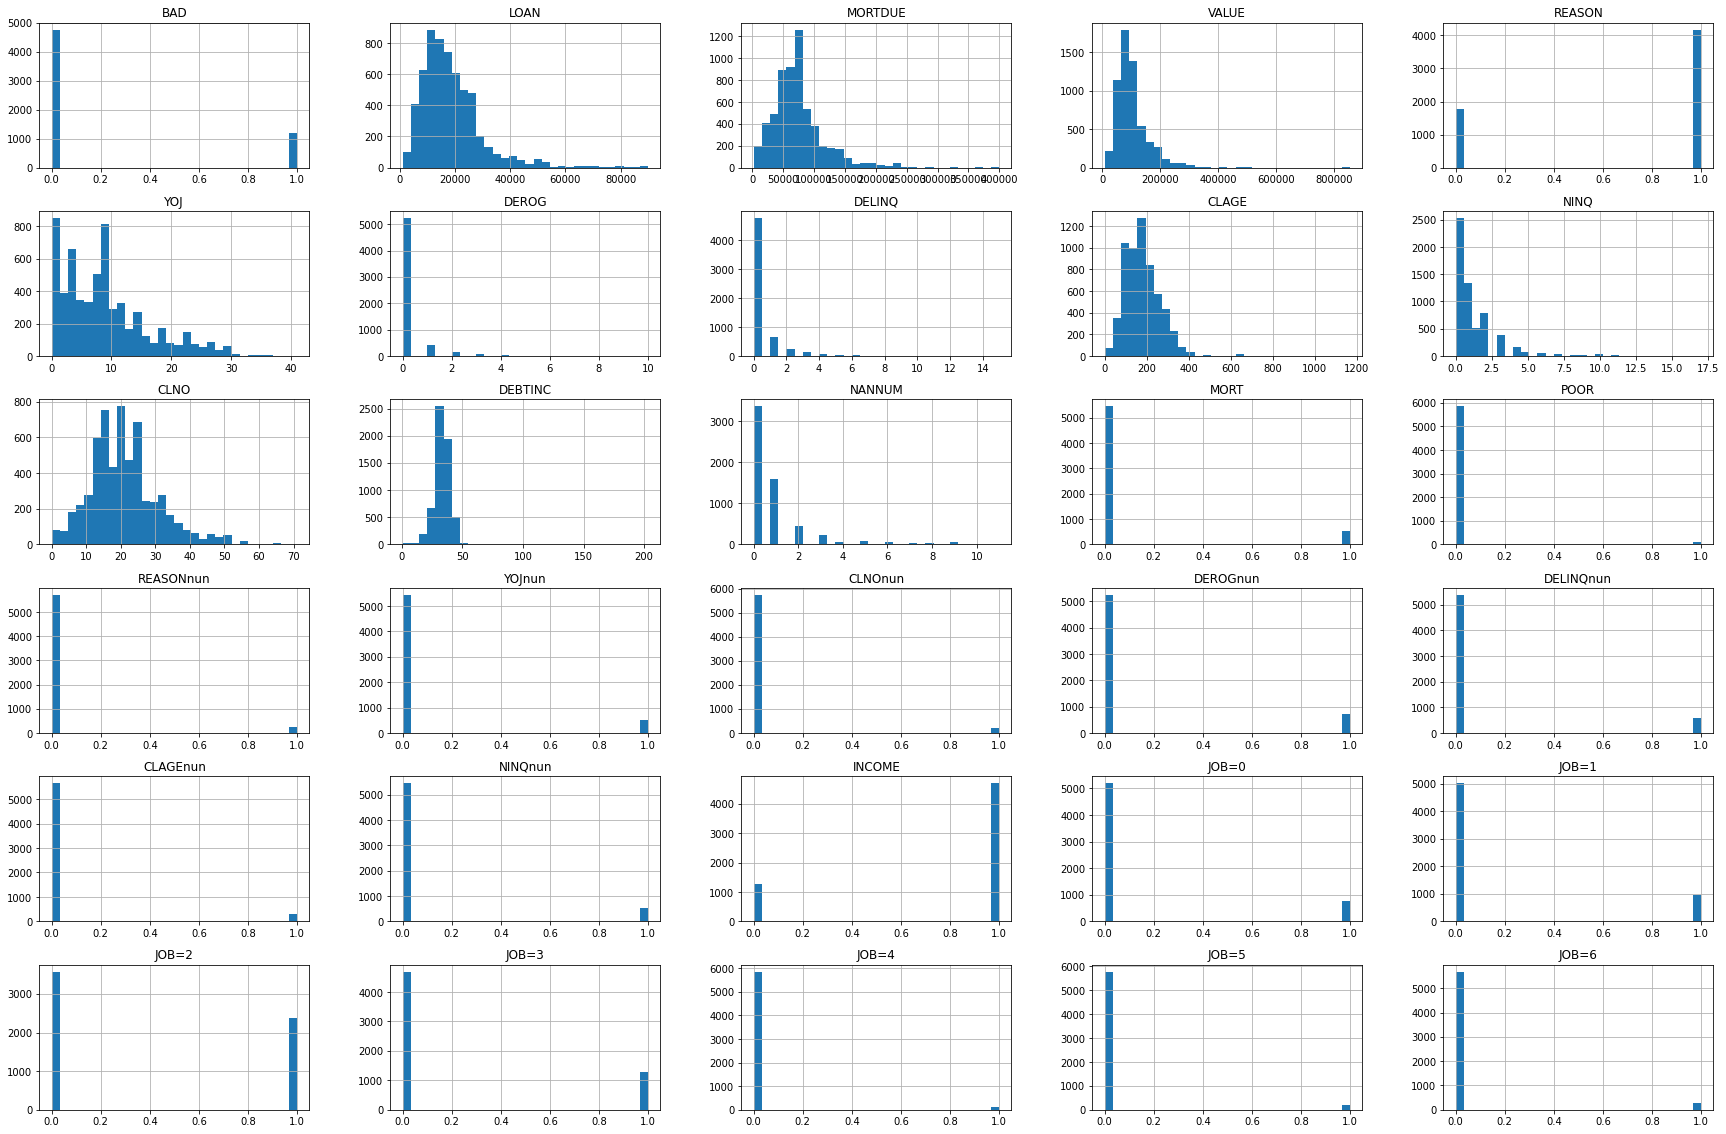

In [78]:
df.hist(bins=30, figsize=(30,20));

In [71]:
ohe = OneHotEncoder(sparse = False)
new_ohe_features = ohe.fit_transform(df.JOB.values.reshape(-1,1))
tmp = pd.DataFrame(new_ohe_features, columns=['JOB=' + str(job) for job in range(new_ohe_features.shape[1])])
df = pd.concat([df, tmp], axis=1, join='outer')


In [72]:
jobs = dict(zip(ohe.categories_[0],range(len(ohe.categories_[0]))))

In [73]:
with open("jobs.json", "w") as write_file:
    json.dump(jobs, write_file)

In [74]:
df = df.drop(['JOB'], axis=1)

In [75]:
df.shape

(5960, 30)

In [75]:
df.groupby('BAD').agg({'BAD':'count'})

,BAD
BAD,
0,4771
1,1189


# Train Test spliting

In [76]:
df_with_nan = df.loc[df.NANNUM != 0]
df_without_nan = df.loc[df.NANNUM == 0]

In [77]:
print(df_with_nan.shape)
print(df_without_nan.shape)
print(df.shape)

(2596, 30)
(3364, 30)
(5960, 30)


In [78]:
df_with_nan.groupby('BAD').agg({'BAD':'count'})

,BAD
BAD,
0,1707
1,889


In [79]:
df_without_nan.groupby('BAD').agg({'BAD':'count'})

,BAD
BAD,
0,3064
1,300


In [80]:
#Data_test = df_without_nan.sample(2000)                                              # Случайно выбираем 1000 строк для Data_test

#Data_train = df_without_nan[~df_without_nan.index.isin(Data_test.index)]          # Все остальные записываем в Data_train
#Data_validation = Data_test.sample(1000)                                           # Записываем половину наблюдений их Data_test в Data_validation

#Data_test = Data_test[~Data_test.index.isin(Data_validation.index)]         # Все остальные осталвем в Data_test
                                                                                        # Таким образом наблюдения в трех наборах не пересекаются и можно их дополнять наблюдениями, например методом SMOTE

In [81]:
#X_train = Data_train.drop(['BAD'], axis=1)
#y_train = Data_train.BAD

#X_test = Data_test.drop(['BAD'], axis=1)
#y_test = Data_test.BAD

#X_validation = Data_validation.drop(['BAD'], axis=1)
#y_validation = Data_validation.BAD

### Разделим выборку, содержащую пропущенные значения

Пусть тестовая и тренировочная выборки вместе будут составлять 20% от общего числа

In [82]:
test_val_len = int(df_with_nan.shape[0] * 0.2)

In [83]:
WN_Data_test = df_with_nan.sample(test_val_len)                                              # Случайно выбираем 1000 строк для Data_test

WN_Data_train = df_with_nan[~df_with_nan.index.isin(WN_Data_test.index)]          # Все остальные записываем в Data_train
WN_Data_validation = WN_Data_test.sample(test_val_len // 2)                                           # Записываем половину наблюдений их Data_test в Data_validation

WN_Data_test = WN_Data_test[~WN_Data_test.index.isin(WN_Data_validation.index)]         # Все остальные осталвем в Data_test
                                                                                        # Таким образом наблюдения в трех наборах не пересекаются и можно их дополнять наблюдениями, например методом SMOTE

In [84]:
print(WN_Data_train.shape)
print(WN_Data_test.shape)
print(WN_Data_validation.shape)

(2077, 30)
(260, 30)
(259, 30)


In [85]:
WN_X_train = WN_Data_train.drop(['BAD'], axis=1)
WN_y_train = WN_Data_train.BAD

WN_X_test = WN_Data_test.drop(['BAD'], axis=1)
WN_y_test = WN_Data_test.BAD

WN_X_validation = WN_Data_validation.drop(['BAD'], axis=1)
WN_y_validation = WN_Data_validation.BAD

### Разделим выборку, не содержащую пропущенных значений

In [86]:
test_val_len = int(df_without_nan.shape[0] * 0.2)

In [87]:
WON_Data_test = df_without_nan.sample(test_val_len)                                              # Случайно выбираем 1000 строк для Data_test

WON_Data_train = df_without_nan[~df_without_nan.index.isin(WON_Data_test.index)]          # Все остальные записываем в Data_train
WON_Data_validation = WON_Data_test.sample(test_val_len // 2)                                           # Записываем половину наблюдений их Data_test в Data_validation

WON_Data_test = WON_Data_test[~WON_Data_test.index.isin(WON_Data_validation.index)]         # Все остальные осталвем в Data_test
                                                                                        # Таким образом наблюдения в трех наборах не пересекаются и можно их дополнять наблюдениями, например методом SMOTE

In [88]:
print(WON_Data_train.shape)
print(WON_Data_test.shape)
print(WON_Data_validation.shape)

(2692, 30)
(336, 30)
(336, 30)


In [89]:
WON_X_train = WON_Data_train.drop(['BAD'], axis=1)
WON_y_train = WON_Data_train.BAD

WON_X_test = WON_Data_test.drop(['BAD'], axis=1)
WON_y_test = WON_Data_test.BAD

WON_X_validation = WON_Data_validation.drop(['BAD'], axis=1)
WON_y_validation = WON_Data_validation.BAD

# Balancing

In [90]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [91]:
#smote = SMOTE(random_state=0)
#X_train, y_train = smote.fit_resample(X_train, y_train)
#X_test, y_test = smote.fit_resample(X_test, y_test)
#X_validation, y_validation = smote.fit_resample(X_validation, y_validation)

In [92]:
ros = RandomOverSampler(random_state=0)
smote = SMOTE(random_state=0)

In [93]:
WN_X_train, WN_y_train = smote.fit_resample(WN_X_train, WN_y_train)
WN_X_test, WN_y_test = smote.fit_resample(WN_X_test, WN_y_test)
WN_X_validation, WN_y_validation = smote.fit_resample(WN_X_validation, WN_y_validation)

In [94]:

WON_X_train, WON_y_train = smote.fit_resample(WON_X_train, WON_y_train)
WON_X_test, WON_y_test = smote.fit_resample(WON_X_test, WON_y_test)
WON_X_validation, WON_y_validation = smote.fit_resample(WON_X_validation, WON_y_validation)

In [95]:
X_train = pd.concat([WN_X_train, WON_X_train])
X_test = pd.concat([WN_X_test, WON_X_test])
X_validation = pd.concat([WN_X_validation, WON_X_validation])

y_train = pd.concat([WN_y_train, WON_y_train])
y_test = pd.concat([WN_y_test, WON_y_test])
y_validation = pd.concat([WN_y_validation, WON_y_validation])

# Feature Selection

In [96]:
from sklearn.feature_selection import SelectKBest, chi2

In [97]:
selector = SelectKBest(chi2, k=10)
selector.fit(X_train, y_train)
X_new = selector.transform(X_train)

col_names = X_train.columns[selector.get_support()]

In [98]:
X_train.columns[selector.get_support()]

Index(['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
       'DEBTINC', 'DEROGnun'],
      dtype='object')

In [99]:
X_train = X_train[col_names]
X_test = X_test[col_names]
X_validation = X_validation[col_names]

# Scaling

In [110]:
# is_norm_map - массив из элементов (0,1,2), где 
# 0 - признак распределен не нормально (близок к показалельному распределению), 
# 1 - признак напоминает нормальное распределение, 
# 2 - бинарный признак (не нужнается в нормировке)
def getMinMaxBorders(df, is_norm_map):
  min_borders = {}
  max_borders = {}

  for col in df.columns:
    q1 = np.quantile(df[col], 0.25)
    q2 = np.quantile(df[col], 0.75)
    if (is_norm_map[col] != 2):
      if (is_norm_map[col] == 1):
        max = q2 + 1.5*(q2-q1)
        max_borders[col] = max
      else:
        max = q2 + 3*(q2-q1)
        max_borders[col] = max
      min = q1 - 1.5*(q2-q1)
      min_borders[col] = min
    
  return [min_borders, max_borders]

#def Normalization(df, is_norm_map):
#  for col in df.columns:
#    q1 = np.quantile(df[col], 0.25)
#    q2 = np.quantile(df[col], 0.75)
#    if (is_norm_map[col] != 2):
#      if (is_norm_map[col] == 1):
#        max = q2 + 1.5*(q2-q1)
#      else:
#        max = q2 + 3*(q2-q1)
#      min = q2 - 1.5*(q2-q1)
#      if (max - min != 0):
#        df[col] = (df[col] - min) / (max - min)
#    
#  return df

def Normalization(df, is_norm_map, min_b, max_b):
  for col in df.columns:
    if (is_norm_map[col] != 2):
      if (max_b[col] - min_b[col] != 0):
        df[col] = (df[col] - min_b[col]) / (max_b[col] - min_b[col])
    
  return df

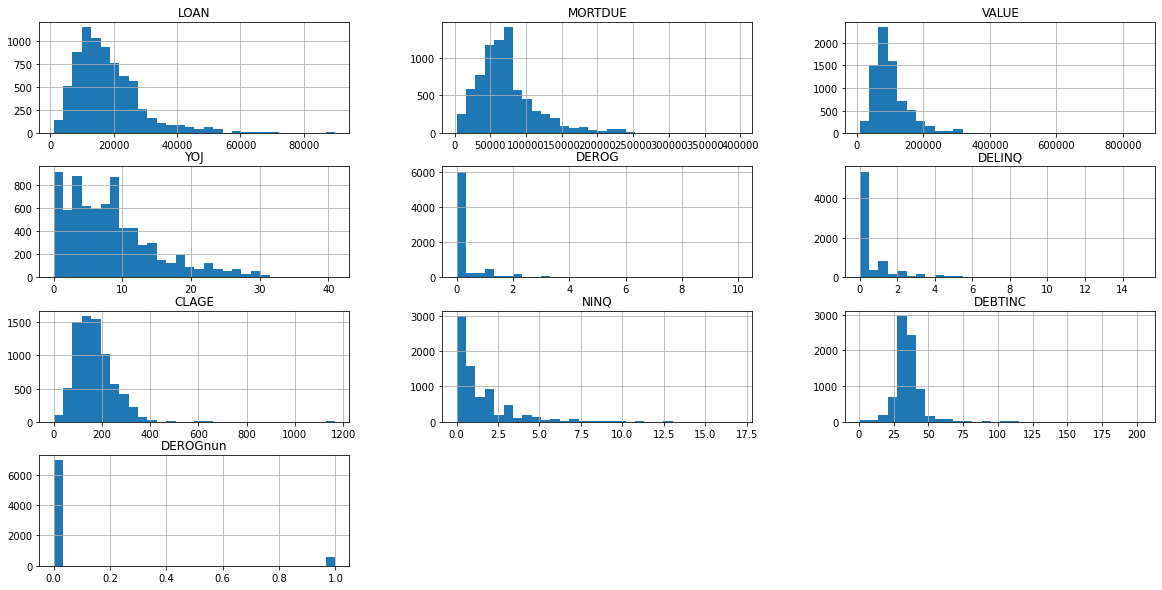

In [111]:
X_train.hist(bins=30, figsize=(20,10))
plt.show()

In [112]:
is_norm_dist = [1,1,1,
                0,0,0,
                1,0,1,
                2]

In [1]:
pd.concat([X_train, X_test, X_validation])

NameError: name 'pd' is not defined

In [113]:
min_b, max_b = getMinMaxBorders(X_train, dict(zip(X_train.columns, is_norm_dist)))

In [114]:
with open("min_borders.json", "w") as write_file:
    json.dump(min_b, write_file)

with open("max_borders.json", "w") as write_file:
    json.dump(max_b, write_file)

In [115]:
# Нормируем данные
X_train = Normalization(X_train, dict(zip(X_train.columns, is_norm_dist)), min_b, max_b)
X_test = Normalization(X_test, dict(zip(X_test.columns, is_norm_dist)), min_b, max_b)
X_validation = Normalization(X_validation, dict(zip(X_validation.columns, is_norm_dist)), min_b, max_b)

In [116]:
#def Normalizer(df):
#    df = (df - df.mean()) / df.var()
#    return df

#X_train =       Normalizer(X_train)
#X_test =        Normalizer(X_test)
#X_validation =  Normalizer(X_validation)


# Random Forest Regressor

max_depth = 29/29

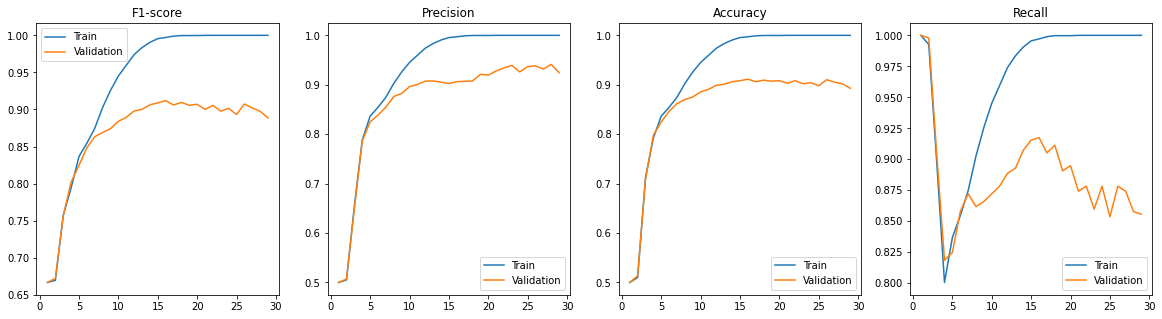

In [117]:
from sklearn.ensemble import RandomForestRegressor
model_metrics = ModelMetrics()

max_depth_values = range(1,30)
for max_depth in max_depth_values:
    forest = RandomForestRegressor(max_depth=max_depth)
    forest.fit(X_train, y_train)

    y_pred = forest.predict(X_train)
    threshold = np.quantile(y_pred, 0.5)
    y_pred = get_bin_pred(y_pred, threshold)

    model_metrics.AddMetrics(y_train, y_pred, 'train')

    y_pred = get_bin_pred(forest.predict(X_validation), threshold)
    model_metrics.AddMetrics(y_validation, y_pred, 'validation')

    print(f'\rmax_depth = {max_depth}/{max_depth_values[-1]}', end='')

LearningPlots(max_depth_values, model_metrics.GetTrainMetrics(), model_metrics.GetValidationMetrics())

In [118]:
forest_regressor = RandomForestRegressor(max_depth=12)
forest_regressor.fit(X_train, y_train)

y_pred = forest_regressor.predict(X_train)
threshold = np.quantile(y_pred, 0.5)


Metrics in test:
Accuracy 0.88
F1 score 0.87
Precision 0.91
Recall 0.84



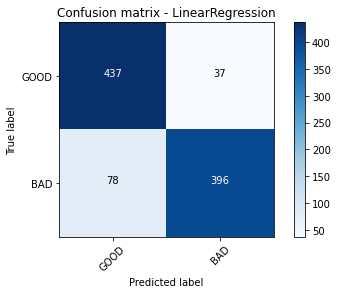

16.46% среди плохих заемщиков был одобрен кредит
83.54% среди плохих заемщиков были определены как плохие

7.81% среди хороших заемщиков было отказано в кредите
92.19% среди хороших заемщиков были определены как хорошие


In [119]:
y_pred = forest_regressor.predict(X_test)
y_pred = get_bin_pred(y_pred, threshold)
a0, f0, p0, r0 = get_result(y_test, y_pred)

# Linear Regression


Metrics in test:
Accuracy 0.68
F1 score 0.67
Precision 0.7
Recall 0.64



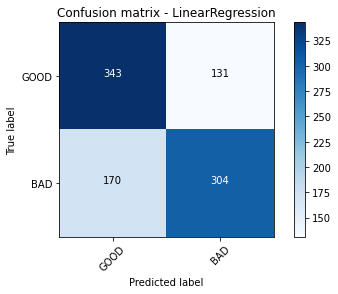

35.86% среди плохих заемщиков был одобрен кредит
64.14% среди плохих заемщиков были определены как плохие

27.64% среди хороших заемщиков было отказано в кредите
72.36% среди хороших заемщиков были определены как хорошие


In [120]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_train)

threshold = np.quantile(y_pred, 0.5)

y_pred = get_bin_pred(regressor.predict(X_test), threshold)
a1, f1, p1, r1 = get_result(y_test, y_pred)

In [276]:
#temp = pd.DataFrame({'y_pred':np.array(regressor.predict(X_train)), 'y_true':np.array(y_train)})

#first_board = np.quantile(regressor.predict(X_test), 0.25)
#second_board = np.quantile(regressor.predict(X_test), 0.5)
#third_board = np.quantile(regressor.predict(X_test), 0.75)

#temp = pd.DataFrame({'y_pred':np.array(regressor.predict(X_test)), 'y_true':np.array(y_test)})

In [277]:
#first_class = temp.loc[np.array(temp.y_pred < first_board)]
#first_class = first_class.drop(['y_pred'], axis=1)
#first_class['y_pred'] = np.ones(len(first_class)) - 1
#get_result(first_class.y_true, first_class.y_pred)

In [278]:
#import random

In [279]:
#second_class = temp.loc[np.array(temp.y_pred >= first_board) & np.array(temp.y_pred < third_board)]
#pred = np.array(second_class.y_pred)
#second_class = second_class.drop(['y_pred'], axis=1)
#second_class['y_pred'] = get_bin_pred(pred, threshold=pred.min() + (pred.max() - pred.min()) / 2.)
#get_result(second_class.y_true, second_class.y_pred)

In [280]:
#third_class = temp.loc[np.array(temp.y_pred > third_board)]
#third_class = third_class.drop(['y_pred'], axis=1)
#third_class['y_pred'] = np.ones(len(third_class))
#get_result(third_class.y_true, third_class.y_pred)

In [281]:
#ggg = pd.concat([first_class, third_class])
#get_result(ggg.y_true, ggg.y_pred)

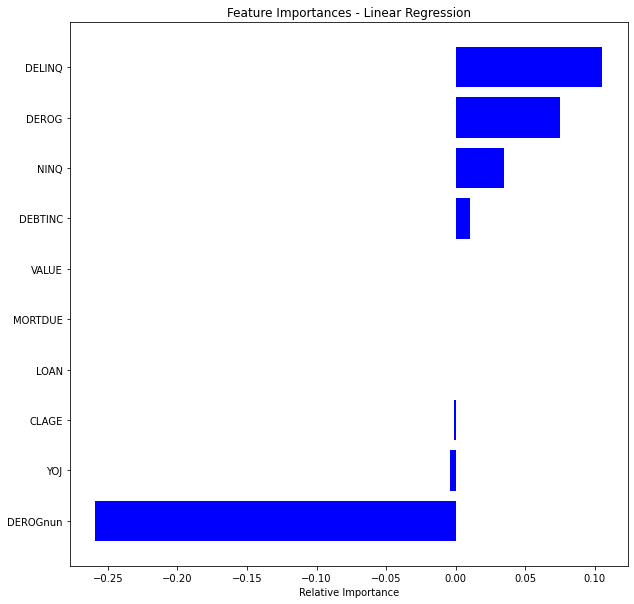

In [105]:
PlotFeatureImportances(X_train.columns, regressor.coef_, name="Linear Regression")

# SVC


Metrics in test:
Accuracy 0.76
F1 score 0.74
Precision 0.82
Recall 0.67



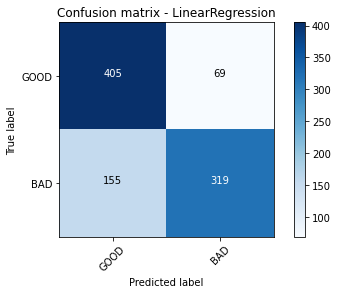

32.7% среди плохих заемщиков был одобрен кредит
67.3% среди плохих заемщиков были определены как плохие

14.56% среди хороших заемщиков было отказано в кредите
85.44% среди хороших заемщиков были определены как хорошие


In [123]:
svc = svm.SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

a2, f2, p2, r2 = get_result(y_test, y_pred)

# Random Forest Classifier

max_depth = 29/29

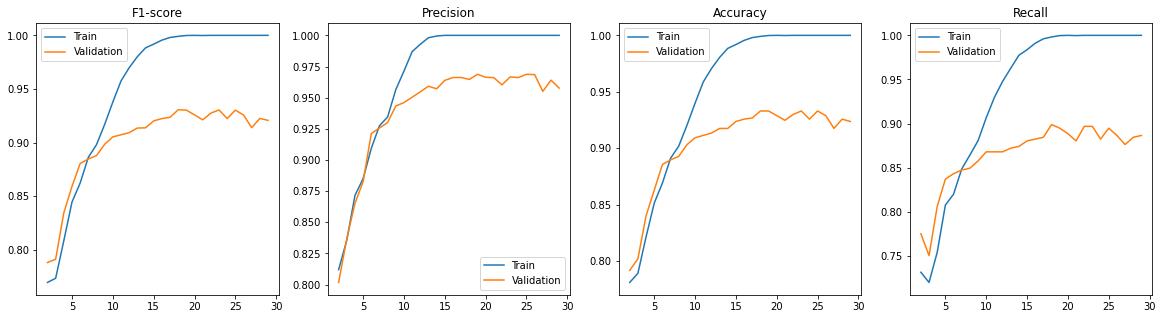

In [124]:
model_metrics = ModelMetrics()

max_depth_values = range(2,30)
for max_depth in max_depth_values:
    forest = RandomForestClassifier(max_depth=max_depth)
    forest.fit(X_train, y_train)

    y_pred = forest.predict(X_train)
    model_metrics.AddMetrics(y_train, y_pred, 'train')

    y_pred = forest.predict(X_validation)
    model_metrics.AddMetrics(y_validation, y_pred, 'validation')

    print(f'\rmax_depth = {max_depth}/{max_depth_values[-1]}', end='')

LearningPlots(max_depth_values, model_metrics.GetTrainMetrics(), model_metrics.GetValidationMetrics())


Metrics in test:
Accuracy 0.89
F1 score 0.88
Precision 0.96
Recall 0.82



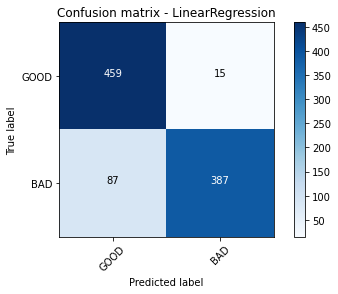

18.35% среди плохих заемщиков был одобрен кредит
81.65% среди плохих заемщиков были определены как плохие

3.16% среди хороших заемщиков было отказано в кредите
96.84% среди хороших заемщиков были определены как хорошие


In [108]:
forest = RandomForestClassifier(max_depth=15)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
a3, f3, p3, r3 = get_result(y_test, y_pred)

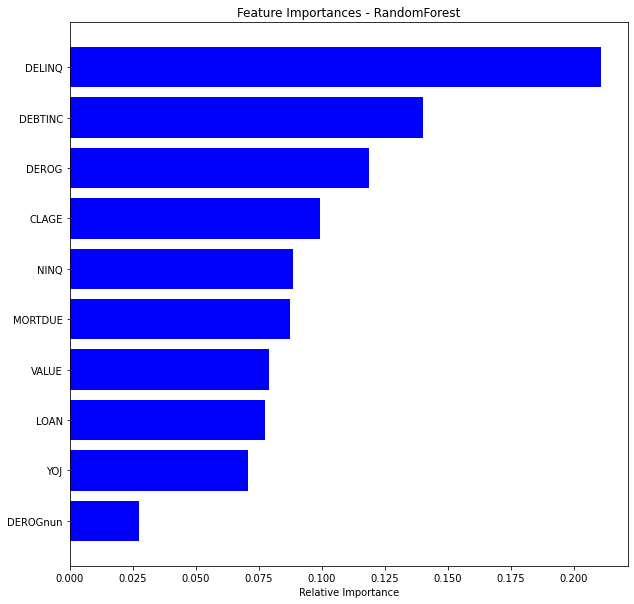

In [125]:
PlotFeatureImportances(X_train.columns, forest.feature_importances_, name="RandomForest")

# Decision Tree Classifier

max_depth = 39/39

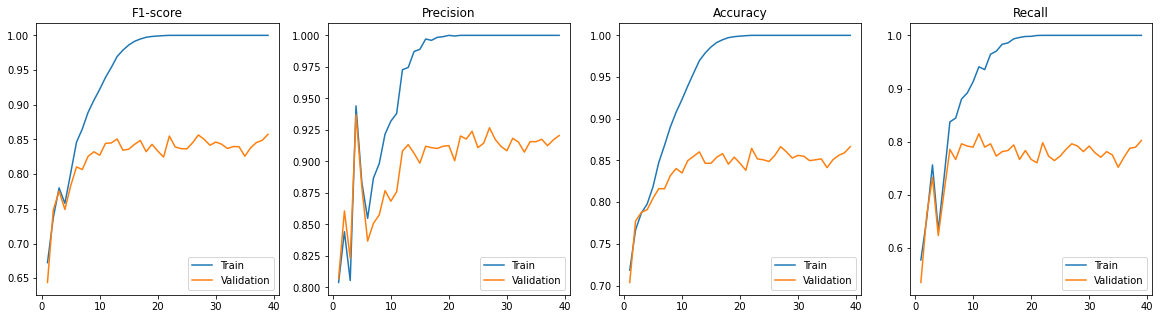

In [132]:
model_metrics = ModelMetrics()

max_depth_values = range(1,40)
for max_depth in max_depth_values:
  tree = DecisionTreeClassifier(max_depth=max_depth)
  tree.fit(X_train, y_train)

  y_pred = tree.predict(X_train)
  model_metrics.AddMetrics(y_train, y_pred, 'train')

  y_pred = tree.predict(X_validation)
  model_metrics.AddMetrics(y_validation, y_pred, 'validation')

  print(f'\rmax_depth = {max_depth}/{max_depth_values[-1]}', end='')

LearningPlots(max_depth_values, model_metrics.GetTrainMetrics(), model_metrics.GetValidationMetrics())


Metrics in test:
Accuracy 0.86
F1 score 0.84
Precision 0.91
Recall 0.79



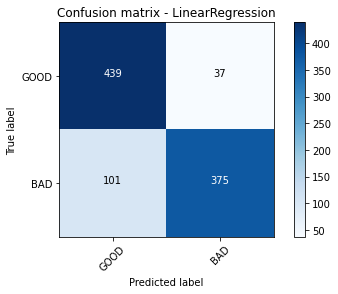

21.22% среди плохих заемщиков был одобрен кредит
78.78% среди плохих заемщиков были определены как плохие

7.77% среди хороших заемщиков было отказано в кредите
92.23% среди хороших заемщиков были определены как хорошие


In [136]:
tree_model = DecisionTreeClassifier(max_depth=15)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_validation)

a4, f4, p4, r4 = get_result(y_validation, y_pred)

In [866]:
#plt.figure(figsize=(50,30))
#tree.plot_tree(tree_model, feature_names=X_train.columns);

# Neiral Network

In [138]:
nn_model = Sequential([
            Dense(20, activation='relu'),
            Dropout(0.5),
            Dense(14, activation='relu'),
            Dropout(0.5),
            Dense(7, activation='relu'),
            Dropout(0.5),
            Dense(1, activation='sigmoid')])

EPOCHS = 40

nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy', keras.metrics.Recall(), keras.metrics.Precision()])

history = nn_model.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_validation, y_validation), shuffle=True, verbose=0)

In [139]:
key_names = list(history.history.keys())

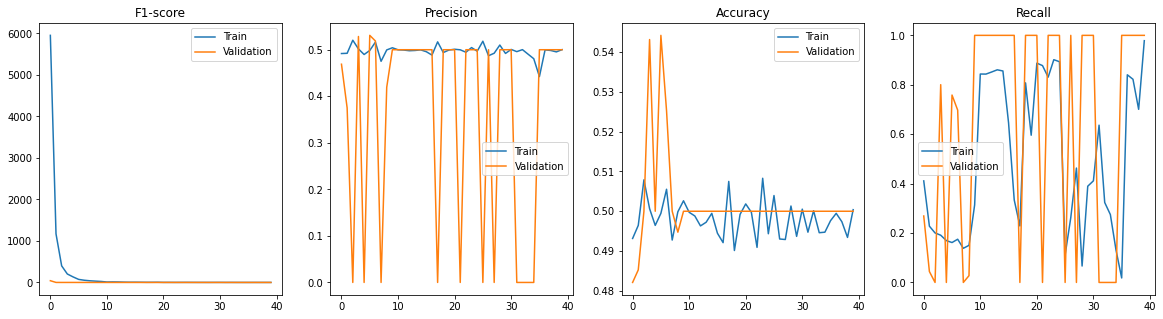

In [140]:

train_loss = history.history[key_names[0]]
val_loss = history.history[key_names[4]]

train_accuracy = history.history[key_names[1]]
val_accuracy = history.history[key_names[5]]

train_recall = history.history[key_names[2]]
val_recall = history.history[key_names[6]]

train_precision = history.history[key_names[3]]
val_precision = history.history[key_names[7]]

model_metrics = ModelMetrics()
model_metrics.SetMetrics({'accuracy': train_accuracy, 'f1':train_loss, 'precision': train_precision, 'recall':train_recall}, 'train')
model_metrics.SetMetrics({'accuracy': val_accuracy, 'f1':val_loss, 'precision': val_precision, 'recall':val_recall}, 'validation')

LearningPlots(range(EPOCHS), model_metrics.GetTrainMetrics(), model_metrics.GetValidationMetrics())

31/31 [==============================] - 0s 935us/step

Metrics in test:
Accuracy 0.5
F1 score 0.67
Precision 0.5
Recall 1.0



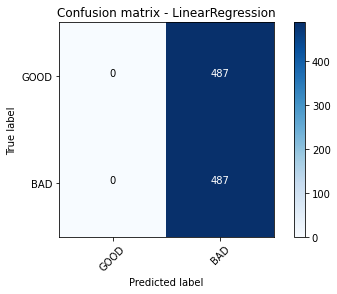

0.0% среди плохих заемщиков был одобрен кредит
100.0% среди плохих заемщиков были определены как плохие

100.0% среди хороших заемщиков было отказано в кредите
0.0% среди хороших заемщиков были определены как хорошие


In [141]:
y_pred = nn_model.predict(X_test)
threshold = 0.5
y_pred = get_bin_pred(y_pred, threshold)

a5, f5, p5, r5 = get_result(y_test, y_pred)

# CatBoost

In [ ]:
#pip install catboost
from catboost import CatBoostClassifier
cat = CatBoostClassifier(4000, max_depth=3, learning_rate=0.01, custom_loss=['AUC', 'Accuracy', 'Recall', 'Precision', 'F1'], random_seed=62, verbose=0)
cat.fit(X_train, y_train, metric_period=1, plot=True, eval_set=(X_validation, y_validation))


Metrics in test:
Accuracy 0.94
F1 score 0.94
Precision 0.95
Recall 0.93



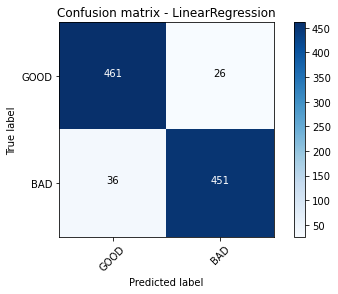

7.39% среди плохих заемщиков был одобрен кредит
92.61% среди плохих заемщиков были определены как плохие

5.34% среди хороших заемщиков было отказано в кредите
94.66% среди хороших заемщиков были определены как хорошие


In [127]:
y_pred = cat.predict(X_test)

a6, f6, p6, r6 = get_result(y_test, y_pred)

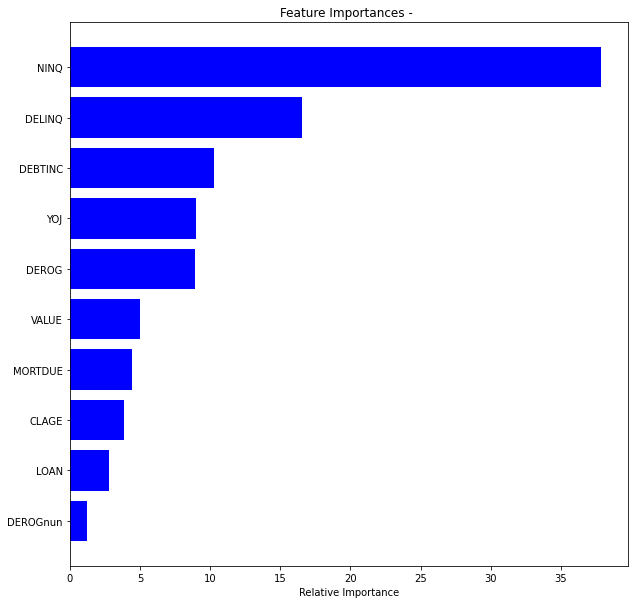

In [128]:
PlotFeatureImportances(X_train.columns, cat.feature_importances_)

In [142]:
with_SMOTE = pd.DataFrame({'Model':['Random Foresr Regressor','Linear Regression', 'SVC', 'Random Forest Classifier', 'Decision Tree', 'Neiral Network', 'CatBoost'],
              'Accuracy':[a0,a1,a2,a3,a4,a5,a6],
              'Presicion':[p0,p1,p2,p3,p4,p5,p6],
              'Recall':[r0,r1,r2,r3,r4,r5,r6],
              'F1':[f0,f1,f2,f3,f4,f5,f6],
              'Oversampling method':['SMOTE','SMOTE','SMOTE','SMOTE','SMOTE','SMOTE','SMOTE']}).set_index('Model')

In [143]:
#without_SMOTE['Oversampling method']=['ROS','ROS','ROS','ROS','ROS','ROS']

In [144]:
#without_SMOTE

In [145]:
with_SMOTE

,Accuracy,Presicion,Recall,F1,Oversampling method
Model,,,,,
Random Foresr Regressor,0.89,0.90,0.88,0.89,SMOTE
Linear Regression,0.78,0.75,0.83,0.79,SMOTE
SVC,0.57,0.61,0.40,0.48,SMOTE
Random Forest Classifier,0.92,0.95,0.89,0.92,SMOTE
Decision Tree,0.86,0.91,0.79,0.84,SMOTE
Neiral Network,0.50,0.50,1.00,0.67,SMOTE
CatBoost,0.94,0.95,0.93,0.94,SMOTE


<AxesSubplot:>

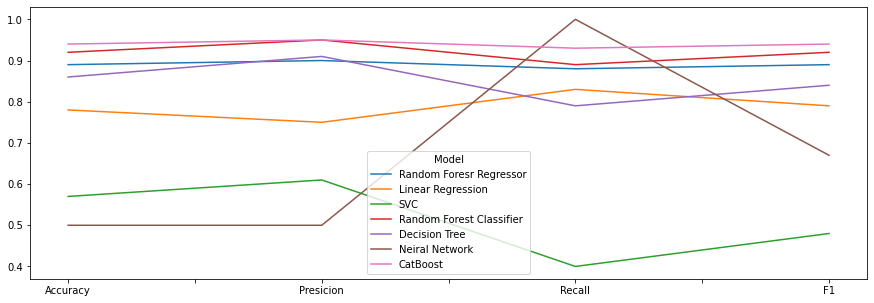

In [146]:
with_SMOTE.drop(['Oversampling method'],axis=1).T.plot(figsize=(15,5))

<AxesSubplot:>

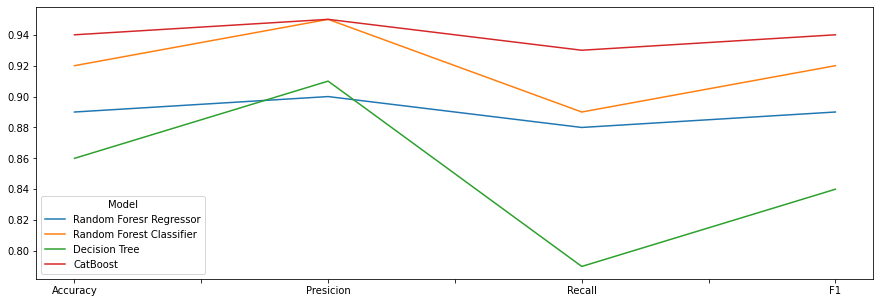

In [147]:
with_SMOTE.drop(['Oversampling method'],axis=1).drop(['Neiral Network','SVC','Linear Regression']).T.plot(figsize=(15,5))

## Из результатов видно, что деревья решений и их ансамбли наиболее точно решают задачу классификации. Это связано с тем, что деревья устойчивы к выбросам и не нуждаюся в нормировке данных

In [167]:
with_SMOTE

,Accuracy,Presicion,Recall,F1,Oversampling method
Model,,,,,
Linear Regression,0.71,0.65,0.91,0.76,SMOTE
SVC,0.54,0.59,0.26,0.36,SMOTE
Random Forest,0.95,0.96,0.93,0.95,SMOTE
Decision Tree,0.85,0.92,0.76,0.83,SMOTE
Neiral Network,0.50,0.50,1.00,0.67,SMOTE
CatBoost,0.95,0.96,0.93,0.95,SMOTE


<AxesSubplot:>

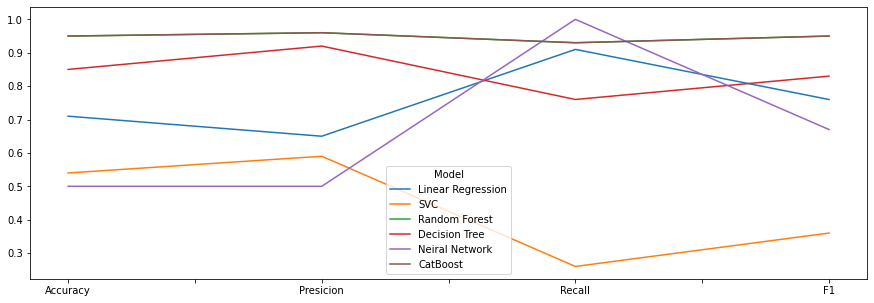

In [168]:
with_SMOTE.drop(['Oversampling method'],axis=1).T.plot(figsize=(15,5))

<AxesSubplot:>

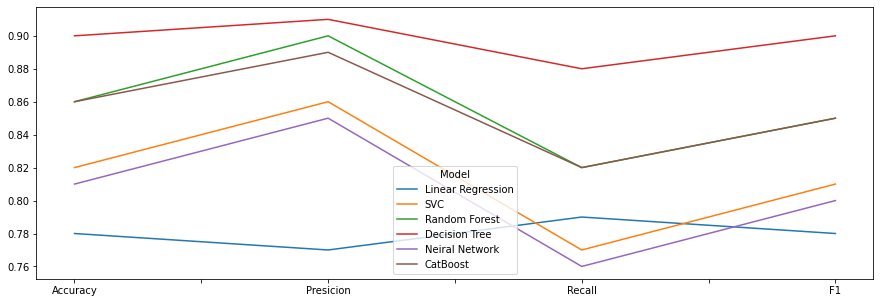

In [160]:
with_SMOTE

,Accuracy,Presicion,Recall,F1,Oversampling method
Model,,,,,
Linear Regression,0.84,0.81,0.88,0.84,SMOTE
SVC,0.86,0.88,0.84,0.86,SMOTE
Random Forest,0.92,0.91,0.94,0.92,SMOTE
Decision Tree,0.82,0.83,0.80,0.82,SMOTE
Neiral Network,0.88,0.88,0.87,0.88,SMOTE
CatBoost,0.90,0.88,0.92,0.90,SMOTE


In [161]:
#pd.pivot_table(pd.concat([without_SMOTE, with_SMOTE]),index = ["Model","Oversampling method"])

In [162]:
#without_SMOTE.drop(['Oversampling method'],axis=1).T.plot(figsize=(15,5))

<AxesSubplot:>

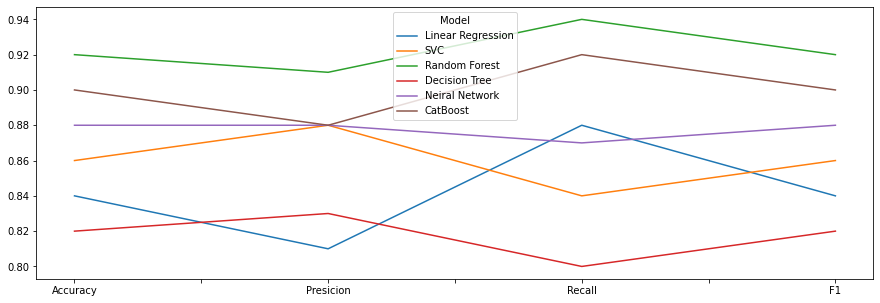

In [163]:
with_SMOTE.drop(['Oversampling method'],axis=1).T.plot(figsize=(15,5))

# Вывод
### Как видим, балансирование классов с помощью метода SMOTE в общем улучшило показания метрик. Также можно заметить, что дерево решений справилось с задачей определенно лучше других алгоритмов.

Сохраним модель RandomForestClassifier

In [1098]:
from joblib   import dump, load
dump (forest, 'forest_model.joblib') 

['forest_model.joblib']